# Kalvium Data Analyst Position Task

## Task 1: Scraping the data

Analyzing sample urls - 

Gujarat (1) - https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS061.htm

Bihar(1) - https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS041.htm

Andaman and Nicobar - https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseU011.htm

After analyzing the data, I found out that indexing of all the States start 'S' and Union Territories start with 'U'

## Exploring the HTML

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS069.htm"

page = requests.get(url)

soup = BeautifulSoup(page.content,"html.parser")

results = soup.find(div = "table-responsive")

In [2]:
print("Classes of each table:")
for table in soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['table', 'table-striped', 'table-bordered']


In [3]:
table = soup.find('table', class_ = 'table')

In [4]:
state_name = soup.find("strong")
state_name.text

' (Gujarat)'

In [5]:
table

<table class="table table-striped table-bordered">
<thead>
<tr>
<th>S.N.</th>
<th style="text-align: left;">Candidate</th>
<th style="text-align: left;">Party</th>
<th>EVM Votes </th>
<th>Postal Votes</th>
<th>Total Votes</th>
<th>% of Votes</th>
</tr>
</thead>
<tbody>
<tr><td>1</td><td align="left">CHANDUBHAI CHHAGANBHAI SHIHORA</td><td align="left">Bharatiya Janata Party</td><td align="right">664093</td><td align="right">5656</td><td align="right">669749</td><td align="right">59.2</td></tr> <tr><td>2</td><td align="left">RUTVIKBHAI LAVJIBHAI MAKWANA</td><td align="left">Indian National Congress</td><td align="right">403461</td><td align="right">4671</td><td align="right">408132</td><td align="right">36.07</td></tr> <tr><td>3</td><td align="left">DABHI ASHOKBHAI SUKHABHAI</td><td align="left">Bahujan Samaj Party</td><td align="right">11885</td><td align="right">151</td><td align="right">12036</td><td align="right">1.06</td></tr> <tr><td>4</td><td align="left">VINODBHAI BABUBHAI SATROT

## Scraping a webpage 

In [6]:
for election_data in table.find_all('tbody'):
    rows = election_data.find_all('tr')
    print(rows)#all the rows in the table 

[<tr><td>1</td><td align="left">CHANDUBHAI CHHAGANBHAI SHIHORA</td><td align="left">Bharatiya Janata Party</td><td align="right">664093</td><td align="right">5656</td><td align="right">669749</td><td align="right">59.2</td></tr>, <tr><td>2</td><td align="left">RUTVIKBHAI LAVJIBHAI MAKWANA</td><td align="left">Indian National Congress</td><td align="right">403461</td><td align="right">4671</td><td align="right">408132</td><td align="right">36.07</td></tr>, <tr><td>3</td><td align="left">DABHI ASHOKBHAI SUKHABHAI</td><td align="left">Bahujan Samaj Party</td><td align="right">11885</td><td align="right">151</td><td align="right">12036</td><td align="right">1.06</td></tr>, <tr><td>4</td><td align="left">VINODBHAI BABUBHAI SATROTIYA</td><td align="left">Independent</td><td align="right">5940</td><td align="right">6</td><td align="right">5946</td><td align="right">0.53</td></tr>, <tr><td>5</td><td align="left">KOLI RAMESHBHAI VIRSANGBHAI VAGHELA</td><td align="left">Independent</td><td align

In [7]:
sr_no = []
candidate_name = []
party_name = []
evm_votes = []
postal_votes = []
total_votes = []
percent_votes = []
for row in rows: 
    sr = row.find_all('td')[0].text
    sr_no.append(sr)
    can_name = row.find_all('td')[1].text
    candidate_name.append(can_name)
    party = row.find_all('td')[2].text
    party_name.append(party)
    e_votes = row.find_all('td')[3].text
    evm_votes.append(e_votes)
    p_votes = row.find_all('td')[4].text
    postal_votes.append(p_votes)
    t_votes = row.find_all('td')[5].text
    total_votes.append(t_votes)
    per_votes = row.find_all('td')[6].text
    percent_votes.append(per_votes)


In [8]:
data_list = [sr_no,
candidate_name,
party_name,
evm_votes,
postal_votes,
total_votes,
percent_votes]

In [9]:
df = pd.DataFrame()
for col,val in zip(df.columns,data_list):
    df[col] = val

In [10]:
df

Empty DataFrame
Columns: []
Index: []

In [11]:
PC = soup.find('h2').text


In [12]:
df["Constituency"] = PC 

In [13]:
df

Empty DataFrame
Columns: [Constituency]
Index: []

## Scrapping the complete webpage

There is option value in html source, we can use that to loop over 
State Wise - 
Gujarat - S061 to S0626
Andhra Pradesh - S011 to S0125
Arunachal Pradesh - S021 to S022
Assam - S031 to S0314


In [14]:
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
first_page = requests.get(url)
first_soup = BeautifulSoup(first_page.content,'html.parser')


In [15]:
option_html = first_soup.find("select", id = "ctl00_ContentPlaceHolder1_Result1_ddlState")
option_html


<select id="ctl00_ContentPlaceHolder1_Result1_ddlState" name="state" onchange="return GetResult(this)"> <option value=""> Select State Wise </option><option value="U01">Andaman &amp; Nicobar Islands</option><option value="S01">Andhra Pradesh</option><option value="S02">Arunachal Pradesh</option><option value="S03">Assam</option><option value="S04">Bihar</option><option value="U02">Chandigarh</option><option value="S26">Chhattisgarh</option><option value="U03">Dadra &amp; Nagar Haveli and Daman &amp; Diu</option><option value="S05">Goa</option><option value="S06">Gujarat</option><option value="S07">Haryana</option><option value="S08">Himachal Pradesh</option><option value="U08">Jammu and Kashmir</option><option value="S27">Jharkhand</option><option value="S10">Karnataka</option><option value="S11">Kerala</option><option value="U09">Ladakh</option><option value="U06">Lakshadweep</option><option value="S12">Madhya Pradesh</option><option value="S13">Maharashtra</option><option value="S14"

In [16]:
def finding_optionValue(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    dropdown_result = soup.find("select", id = "ctl00_ContentPlaceHolder1_Result1_ddlState")
    options = dropdown_result.find_all('option')
    option_value_list = []
    for option in options:
        option_value = option.get('value')
        option_value_list.append(option_value)
    return option_value_list


In [17]:
states_and_ut = finding_optionValue("https://results.eci.gov.in/PcResultGenJune2024/index.htm")
states_and_ut

['',
 'U01',
 'S01',
 'S02',
 'S03',
 'S04',
 'U02',
 'S26',
 'U03',
 'S05',
 'S06',
 'S07',
 'S08',
 'U08',
 'S27',
 'S10',
 'S11',
 'U09',
 'U06',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'U05',
 'S18',
 'U07',
 'S19',
 'S20',
 'S21',
 'S22',
 'S29',
 'S23',
 'S24',
 'S28',
 'S25']

In [18]:
 for index,element in enumerate(states_and_ut[1:]):
        url = f"https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-{element}.htm"
        page = requests.get(url)
        print(index,page.status_code)

0 200
1 200
2 200
3 200
4 200
5 200
6 200
7 200
8 200
9 200
10 200
11 200
12 200
13 200
14 200
15 200
16 200
17 200
18 200
19 200
20 200
21 200
22 200
23 200
24 200
25 200
26 200
27 200
28 200
29 200
30 200
31 200
32 200
33 200
34 200
35 200


In [19]:
assam_try = finding_optionValue("https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S03.htm")

In [20]:
 for index,element in enumerate(assam_try[1:]):
        url = f"https://results.eci.gov.in/PcResultGenJune2024/Constituencywise{element}.htm"
        page = requests.get(url)
        print(index,page.status_code)

0 200
1 200
2 200
3 200
4 200
5 200
6 200
7 200
8 200
9 200
10 200
11 200
12 200
13 200


## Forming main list of each constiuency and printing status code

In [21]:
main_ls = []
state_code_ls = []

for elements in states_and_ut[1:]:
        url = f"https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-{elements}.htm"
        pc = finding_optionValue(url)
        main_ls.append(pc)


In [22]:
main_ls #this is list of list lets flatten it and remove the empty string part 

[['', 'U011'],
 ['',
  'S017',
  'S015',
  'S0119',
  'S011',
  'S0115',
  'S0125',
  'S0110',
  'S0113',
  'S0120',
  'S0121',
  'S016',
  'S0118',
  'S0111',
  'S0117',
  'S019',
  'S0114',
  'S0122',
  'S0116',
  'S018',
  'S0124',
  'S012',
  'S0123',
  'S0112',
  'S014',
  'S013'],
 ['', 'S022', 'S021'],
 ['',
  'S033',
  'S034',
  'S032',
  'S0313',
  'S036',
  'S035',
  'S0314',
  'S037',
  'S0310',
  'S031',
  'S0312',
  'S039',
  'S038',
  'S0311'],
 ['',
  'S049',
  'S0432',
  'S0437',
  'S0427',
  'S0424',
  'S0426',
  'S0433',
  'S0414',
  'S0438',
  'S0417',
  'S0421',
  'S0436',
  'S0440',
  'S047',
  'S0435',
  'S0411',
  'S0425',
  'S0410',
  'S0413',
  'S046',
  'S0419',
  'S0428',
  'S0415',
  'S0429',
  'S0439',
  'S042',
  'S0431',
  'S0430',
  'S0412',
  'S043',
  'S0423',
  'S0420',
  'S0434',
  'S044',
  'S045',
  'S0418',
  'S048',
  'S0422',
  'S0416',
  'S041'],
 ['', 'U021'],
 ['',
  'S2610',
  'S265',
  'S267',
  'S263',
  'S2611',
  'S264',
  'S269',
  'S26

In [23]:
#Flatten the list
flat_main = sum(main_ls, [])
flat_main


['',
 'U011',
 '',
 'S017',
 'S015',
 'S0119',
 'S011',
 'S0115',
 'S0125',
 'S0110',
 'S0113',
 'S0120',
 'S0121',
 'S016',
 'S0118',
 'S0111',
 'S0117',
 'S019',
 'S0114',
 'S0122',
 'S0116',
 'S018',
 'S0124',
 'S012',
 'S0123',
 'S0112',
 'S014',
 'S013',
 '',
 'S022',
 'S021',
 '',
 'S033',
 'S034',
 'S032',
 'S0313',
 'S036',
 'S035',
 'S0314',
 'S037',
 'S0310',
 'S031',
 'S0312',
 'S039',
 'S038',
 'S0311',
 '',
 'S049',
 'S0432',
 'S0437',
 'S0427',
 'S0424',
 'S0426',
 'S0433',
 'S0414',
 'S0438',
 'S0417',
 'S0421',
 'S0436',
 'S0440',
 'S047',
 'S0435',
 'S0411',
 'S0425',
 'S0410',
 'S0413',
 'S046',
 'S0419',
 'S0428',
 'S0415',
 'S0429',
 'S0439',
 'S042',
 'S0431',
 'S0430',
 'S0412',
 'S043',
 'S0423',
 'S0420',
 'S0434',
 'S044',
 'S045',
 'S0418',
 'S048',
 'S0422',
 'S0416',
 'S041',
 '',
 'U021',
 '',
 'S2610',
 'S265',
 'S267',
 'S263',
 'S2611',
 'S264',
 'S269',
 'S262',
 'S268',
 'S266',
 'S261',
 '',
 'U032',
 'U031',
 '',
 'S051',
 'S052',
 '',
 'S067',
 'S06

In [24]:
#for removing blank spaces
for elements in flat_main:
    if (elements == ""):
        flat_main.remove("")
        

In [25]:
len(flat_main)#Now that we know no. of constituency is equal to len of list.

543

## Final Scrapping for all the constituencies

In [26]:
import pandas as pd
def table_scrapper(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    result_table = soup.find("table")
    for body in result_table.find_all('tbody'):
        rows = body.find_all('tr')
    sr_no = []
    candidate_name = []
    party_name = []
    evm_votes = []
    postal_votes = []
    total_votes = []
    percent_votes = []
    for row in rows: 
        sr = row.find_all('td')[0].text
        sr_no.append(sr)
        can_name = row.find_all('td')[1].text
        candidate_name.append(can_name)
        party = row.find_all('td')[2].text
        party_name.append(party)
        e_votes = row.find_all('td')[3].text
        evm_votes.append(e_votes)
        p_votes = row.find_all('td')[4].text
        postal_votes.append(p_votes)
        t_votes = row.find_all('td')[5].text
        total_votes.append(t_votes)
        per_votes = row.find_all('td')[6].text
        percent_votes.append(per_votes)
        pc = soup.find('h2').text
        state_name = soup.find('strong').text
        
        
        data = {
        "Sr No": sr_no,
        "Candidate Name": candidate_name,
        "Party Name": party_name,
        "EVM Votes": evm_votes,
        "Postal Votes": postal_votes,
        "Total Votes": total_votes,
        "Percent Votes": percent_votes,
        "Constituency" : pc,
        "State" : state_name
    }
    
    df = pd.DataFrame(data)
    return df

In [27]:
table_scrapper("https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS072.htm") #test

Sr No               Candidate Name  \
0      1                NAVEEN JINDAL   
1      2              DR SUSHIL GUPTA   
2      3         ABHAY SINGH CHAUTALA   
3      4                 DEEPAK MEHRA   
4      5    JAI KUMAR  SAINI HAMIDPUR   
5      6               PALA RAM SAINI   
6      7               SATBIR KASHYAP   
7      8          KHAZAN SINGH SEHGAL   
8      9                MAHAVIR SINGH   
9     10             INDERJEET KAMBOJ   
10    11         PANDIT ANIL UPADHYAY   
11    12  ADV ASHWINI SHARMA HRITTWAL   
12    13   COMRADE OM PARKASH SHASTRI   
13    14               SURENDER SINGH   
14    15                   AMIT MALIK   
15    16     PATASHO DEVI EX-SARPANCH   
16    17         DR MAHESH CHAND GAUR   
17    18           JAI PARKASH SHARMA   
18    19                  VARUN GUPTA   
19    20              SATNAM BHAZIGAR   
20    21                 NARESH KUMAR   
21    22                 SATISH DHULL   
22    23       ADVOCATE PARDEEP SAINI   
23    24                   SEWA SINGH   
24    25              ER VISHAL KUMAR   
25    26       COMRADE RAMESH KHATKAR   
26    27             OM PARKASH INDAL   
27    28                  PHOOL SINGH   
28    29          SUNNY KASHYAP TEORA   
29    30                      RAMDIYA   
30    31                   MANGAT RAM   
31    32                         NOTA   

                                           Party Name EVM Votes Postal Votes  \
0                              Bharatiya Janata Party    540677         1498   
1                                     Aam Aadmi Party    511770         1384   
2                             Indian National Lok Dal     78362          346   
3                                 Bahujan Samaj Party     20864           80   
4                                         Independent      8090            3   
5                                Jannayak Janta Party      6159           23   
6                  Rashtriya Janshakti Party(Eklavya)      3251           12   
7   Shiromani Akali Dal (Amritsar)(Simranjit Singh...      2824           35   
8                             Ekam Sanatan Bharat Dal      2779            4   
9                 Peoples Party of India (Democratic)      2107            6   
10                                        Independent      2053            3   
11                                        Independent      2027            2   
12        Socialist Unity Centre Of India (COMMUNIST)      1806            6   
13                                        Independent      1599            -   
14                                        Independent      1503            3   
15                                        Independent      1379            -   
16                                        Independent      1338            2   
17                                        Independent      1152            2   
18                                        Independent      1129            5   
19                        Loktantrik Lok Rajyam Party      1063            3   
20                                       Samata Party      1028            4   
21                               Bharatiya Asha Party       991            6   
22                                Rashtriya Garib Dal       958            2   
23                                        Independent       717            1   
24                                        Independent       715            -   
25                                        Independent       714            3   
26                            Global Republican Party       675            3   
27                                        Independent       625            1   
28                                        Independent       576            -   
29                                        Independent       553            3   
30                                        Independent       509            -   
31                                  None of the Above      2420           19   

   Total

In [28]:
#Making empty Dataframe with columns
df_try = pd.DataFrame(columns = ["S.N.","Candidate","Party","EVM Votes","Postal Votes","Total Votes","% of Votes","Constituency"])

In [29]:
import pandas as pd
final_df = pd.DataFrame()
for elements in flat_main:
    url = f"https://results.eci.gov.in/PcResultGenJune2024/Constituencywise{elements}.htm"
    loop_df = table_scrapper(url)
    final_df = pd.concat([final_df,loop_df],axis = 0, ignore_index = True)

In [30]:
final_df

Sr No      Candidate Name                                   Party Name  \
0        1     BISHNU PADA RAY                       Bharatiya Janata Party   
1        2  KULDEEP RAI SHARMA                     Indian National Congress   
2        3          MANOJ PAUL          Andaman Nicobar Democratic Congress   
3        4          D AYYAPPAN          Communist Party of India  (Marxist)   
4        5     V.K. ABDUL AZIZ                                  Independent   
...    ...                 ...                                          ...   
8897     9     SK. SAPIYAR ALI                                  Independent   
8898    10         NIKHIL BERA  Socialist Unity Centre Of India (COMMUNIST)   
8899    11   AMAL KUMAR BARMAN                                  Independent   
8900    12    RAMPRASAD GHORAI                          Indian Unity Centre   
8901    13                NOTA                            None of the Above   

     EVM Votes Postal Votes Total Votes Percent Votes  \
0       102182          254      102436         50.58   
1        77829          211       78040         38.54   
2         8236           18        8254          4.08   
3         6009            8        6017          2.97   
4         2195            8        2203          1.09   
...        ...          ...         ...           ...   
8897      2924            -        2924          0.21   
8898      2095           12        2107          0.15   
8899      1997            3        2000          0.14   
8900      1568            4        1572          0.11   
8901     11263           55       11318          0.81   

                                           Constiteuncy  \
0     Parliamentary  Constituency  1 - Andaman & Nic...   
1     Parliamentary  Constituency  1 - Andaman & Nic...   
2     Parliamentary  Constituency  1 - Andaman & Nic...   
3     Parliamentary  Constituency  1 - Andaman & Nic...   
4     Parliamentary  Constituency  1 - Andaman & Nic...   
...                                                 ...   
8897  Parliamentary  Constituency  26 - Uluberia (We...   
8898  Parliamentary  Constituency  26 - Uluberia (We...   
8899  Parliamentary  Constituency  26 - Uluberia (We...   
8900  Parliamentary  Constituency  26 - Uluberia (We...   
8901  Parliamentary  Constituency  26 - Uluberia (We...   

                             State  
0      (Andaman & Nicobar Islands)  
1      (Andaman & Nicobar Islands)  
2      (Andaman & Nicobar Islands)  
3      (Andaman & Nicobar Islands)  
4      (Andaman & Nicobar Islands)  
...                            ...  
8897                 (West Bengal)  
8898                 (West Bengal)  
8899                 (West Bengal)  
8900                 (West Bengal)  
8901                 (West Bengal)  

[8902 rows x 9 columns]

In [31]:
final_df.nunique()#proof that it worked as constiteuncy is 543

Sr No               55
Candidate Name    8101
Party Name         746
EVM Votes         6081
Postal Votes      1447
Total Votes       6100
Percent Votes     1557
Constiteuncy       543
State               36
dtype: int64

In [32]:
#State Name 
final_df['State'] = final_df['State'].str.extract(r"\((.*?)\)")
final_df

Sr No      Candidate Name                                   Party Name  \
0        1     BISHNU PADA RAY                       Bharatiya Janata Party   
1        2  KULDEEP RAI SHARMA                     Indian National Congress   
2        3          MANOJ PAUL          Andaman Nicobar Democratic Congress   
3        4          D AYYAPPAN          Communist Party of India  (Marxist)   
4        5     V.K. ABDUL AZIZ                                  Independent   
...    ...                 ...                                          ...   
8897     9     SK. SAPIYAR ALI                                  Independent   
8898    10         NIKHIL BERA  Socialist Unity Centre Of India (COMMUNIST)   
8899    11   AMAL KUMAR BARMAN                                  Independent   
8900    12    RAMPRASAD GHORAI                          Indian Unity Centre   
8901    13                NOTA                            None of the Above   

     EVM Votes Postal Votes Total Votes Percent Votes  \
0       102182          254      102436         50.58   
1        77829          211       78040         38.54   
2         8236           18        8254          4.08   
3         6009            8        6017          2.97   
4         2195            8        2203          1.09   
...        ...          ...         ...           ...   
8897      2924            -        2924          0.21   
8898      2095           12        2107          0.15   
8899      1997            3        2000          0.14   
8900      1568            4        1572          0.11   
8901     11263           55       11318          0.81   

                                           Constiteuncy  \
0     Parliamentary  Constituency  1 - Andaman & Nic...   
1     Parliamentary  Constituency  1 - Andaman & Nic...   
2     Parliamentary  Constituency  1 - Andaman & Nic...   
3     Parliamentary  Constituency  1 - Andaman & Nic...   
4     Parliamentary  Constituency  1 - Andaman & Nic...   
...                                                 ...   
8897  Parliamentary  Constituency  26 - Uluberia (We...   
8898  Parliamentary  Constituency  26 - Uluberia (We...   
8899  Parliamentary  Constituency  26 - Uluberia (We...   
8900  Parliamentary  Constituency  26 - Uluberia (We...   
8901  Parliamentary  Constituency  26 - Uluberia (We...   

                          State  
0     Andaman & Nicobar Islands  
1     Andaman & Nicobar Islands  
2     Andaman & Nicobar Islands  
3     Andaman & Nicobar Islands  
4     Andaman & Nicobar Islands  
...                         ...  
8897                West Bengal  
8898                West Bengal  
8899                West Bengal  
8900                West Bengal  
8901                West Bengal  

[8902 rows x 9 columns]

In [33]:
new_order = ["Sr No", "State", "Constituency", "Candidate Name", "Party Name", "EVM Votes", "Postal Votes", "Total Votes", "Percent Votes"]
order_df = final_df[new_order]


In [34]:
order_df.rename(columns = {"Constituency":"Constituency"},inplace = True)

In [35]:
order_df

Sr No                      State  \
0        1  Andaman & Nicobar Islands   
1        2  Andaman & Nicobar Islands   
2        3  Andaman & Nicobar Islands   
3        4  Andaman & Nicobar Islands   
4        5  Andaman & Nicobar Islands   
...    ...                        ...   
8897     9                West Bengal   
8898    10                West Bengal   
8899    11                West Bengal   
8900    12                West Bengal   
8901    13                West Bengal   

                                           Constituency      Candidate Name  \
0     Parliamentary  Constituency  1 - Andaman & Nic...     BISHNU PADA RAY   
1     Parliamentary  Constituency  1 - Andaman & Nic...  KULDEEP RAI SHARMA   
2     Parliamentary  Constituency  1 - Andaman & Nic...          MANOJ PAUL   
3     Parliamentary  Constituency  1 - Andaman & Nic...          D AYYAPPAN   
4     Parliamentary  Constituency  1 - Andaman & Nic...     V.K. ABDUL AZIZ   
...                                                 ...                 ...   
8897  Parliamentary  Constituency  26 - Uluberia (We...     SK. SAPIYAR ALI   
8898  Parliamentary  Constituency  26 - Uluberia (We...         NIKHIL BERA   
8899  Parliamentary  Constituency  26 - Uluberia (We...   AMAL KUMAR BARMAN   
8900  Parliamentary  Constituency  26 - Uluberia (We...    RAMPRASAD GHORAI   
8901  Parliamentary  Constituency  26 - Uluberia (We...                NOTA   

                                       Party Name EVM Votes Postal Votes  \
0                          Bharatiya Janata Party    102182          254   
1                        Indian National Congress     77829          211   
2             Andaman Nicobar Democratic Congress      8236           18   
3             Communist Party of India  (Marxist)      6009            8   
4                                     Independent      2195            8   
...                                           ...       ...          ...   
8897                                  Independent      2924            -   
8898  Socialist Unity Centre Of India (COMMUNIST)      2095           12   
8899                                  Independent      1997            3   
8900                          Indian Unity Centre      1568            4   
8901                            None of the Above     11263           55   

     Total Votes Percent Votes  
0         102436         50.58  
1          78040         38.54  
2           8254          4.08  
3           6017          2.97  
4           2203          1.09  
...          ...           ...  
8897        2924          0.21  
8898        2107          0.15  
8899        2000          0.14  
8900        1572          0.11  
8901       11318          0.81  

[8902 rows x 9 columns]

In [36]:
final_df["State"].value_counts()

Maharashtra                             1169
Tamil Nadu                               989
Uttar Pradesh                            931
West Bengal                              549
Telangana                                542
Bihar                                    537
Karnataka                                502
Andhra Pradesh                           479
Madhya Pradesh                           398
Punjab                                   341
Gujarat                                  291
Rajasthan                                291
Jharkhand                                258
Haryana                                  233
Chhattisgarh                             231
Odisha                                   228
Kerala                                   214
NCT OF Delhi                             169
Assam                                    157
Jammu and Kashmir                        105
Uttarakhand                               60
Himachal Pradesh                          41
Puducherry

In [37]:
order_df.to_csv("final_election_result.csv",index = False)

## About the Data

In [39]:
# import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import matplotlib.style
%matplotlib inline 
from scipy.stats import describe
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings('ignore')

In [43]:
data=pd.read_csv("final_election_result.csv")

In [44]:
data

Sr No                      State  \
0         1  Andaman & Nicobar Islands   
1         2  Andaman & Nicobar Islands   
2         3  Andaman & Nicobar Islands   
3         4  Andaman & Nicobar Islands   
4         5  Andaman & Nicobar Islands   
...     ...                        ...   
8897      9                West Bengal   
8898     10                West Bengal   
8899     11                West Bengal   
8900     12                West Bengal   
8901     13                West Bengal   

                                           Constituency      Candidate Name  \
0     Parliamentary  Constituency  1 - Andaman & Nic...     BISHNU PADA RAY   
1     Parliamentary  Constituency  1 - Andaman & Nic...  KULDEEP RAI SHARMA   
2     Parliamentary  Constituency  1 - Andaman & Nic...          MANOJ PAUL   
3     Parliamentary  Constituency  1 - Andaman & Nic...          D AYYAPPAN   
4     Parliamentary  Constituency  1 - Andaman & Nic...     V.K. ABDUL AZIZ   
...                                                 ...                 ...   
8897  Parliamentary  Constituency  26 - Uluberia (We...     SK. SAPIYAR ALI   
8898  Parliamentary  Constituency  26 - Uluberia (We...         NIKHIL BERA   
8899  Parliamentary  Constituency  26 - Uluberia (We...   AMAL KUMAR BARMAN   
8900  Parliamentary  Constituency  26 - Uluberia (We...    RAMPRASAD GHORAI   
8901  Parliamentary  Constituency  26 - Uluberia (We...                NOTA   

                                       Party Name EVM Votes Postal Votes  \
0                          Bharatiya Janata Party    102182          254   
1                        Indian National Congress     77829          211   
2             Andaman Nicobar Democratic Congress      8236           18   
3             Communist Party of India  (Marxist)      6009            8   
4                                     Independent      2195            8   
...                                           ...       ...          ...   
8897                                  Independent      2924            -   
8898  Socialist Unity Centre Of India (COMMUNIST)      2095           12   
8899                                  Independent      1997            3   
8900                          Indian Unity Centre      1568            4   
8901                            None of the Above     11263           55   

     Total Votes Percent Votes  
0         102436         50.58  
1          78040         38.54  
2           8254          4.08  
3           6017          2.97  
4           2203          1.09  
...          ...           ...  
8897        2924          0.21  
8898        2107          0.15  
8899        2000          0.14  
8900        1572          0.11  
8901       11318          0.81  

[8902 rows x 9 columns]

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sr No           8902 non-null   int64  
 1   State           8902 non-null   object 
 2   Constituency    8902 non-null   object 
 3   Candidate Name  8902 non-null   object 
 4   Party Name      8902 non-null   object 
 5   EVM Votes       8901 non-null   float64
 6   Postal Votes    8324 non-null   float64
 7   Total Votes     8901 non-null   float64
 8   Percent Votes   8901 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 626.0+ KB


In [48]:
data['EVM Votes'] = pd.to_numeric(data['EVM Votes'],errors='coerce')
data['Postal Votes'] = pd.to_numeric(data['Postal Votes'],errors='coerce')
data['Total Votes'] = pd.to_numeric(data['Total Votes'],errors='coerce')
data['Percent Votes'] = pd.to_numeric(data['Percent Votes'],errors='coerce')

In [49]:
data['EVM Votes'].fillna(data['EVM Votes'].median(),inplace=True)
data['Postal Votes'].fillna(0,inplace=True)
data['Total Votes'].fillna(data['Total Votes'].median(),inplace=True)

In [50]:
data.head(10)

Sr No                      State  \
0      1  Andaman & Nicobar Islands   
1      2  Andaman & Nicobar Islands   
2      3  Andaman & Nicobar Islands   
3      4  Andaman & Nicobar Islands   
4      5  Andaman & Nicobar Islands   
5      6  Andaman & Nicobar Islands   
6      7  Andaman & Nicobar Islands   
7      8  Andaman & Nicobar Islands   
8      9  Andaman & Nicobar Islands   
9     10  Andaman & Nicobar Islands   

                                        Constituency        Candidate Name  \
0  Parliamentary  Constituency  1 - Andaman & Nic...       BISHNU PADA RAY   
1  Parliamentary  Constituency  1 - Andaman & Nic...    KULDEEP RAI SHARMA   
2  Parliamentary  Constituency  1 - Andaman & Nic...            MANOJ PAUL   
3  Parliamentary  Constituency  1 - Andaman & Nic...            D AYYAPPAN   
4  Parliamentary  Constituency  1 - Andaman & Nic...       V.K. ABDUL AZIZ   
5  Parliamentary  Constituency  1 - Andaman & Nic...        K J B SELVARAJ   
6  Parliamentary  Constituency  1 - Andaman & Nic...  DR ARUN KUMAR MALLIK   
7  Parliamentary  Constituency  1 - Andaman & Nic...     RINKU MALA MONDAL   
8  Parliamentary  Constituency  1 - Andaman & Nic...     K VENKAT RAM BABU   
9  Parliamentary  Constituency  1 - Andaman & Nic...           USHA KUMARI   

                                 Party Name  EVM Votes  Postal Votes  \
0                    Bharatiya Janata Party   102182.0         254.0   
1                  Indian National Congress    77829.0         211.0   
2       Andaman Nicobar Democratic Congress     8236.0          18.0   
3       Communist Party of India  (Marxist)     6009.0           8.0   
4                               Independent     2195.0           8.0   
5  All India Anna Dravida Munnetra Kazhagam      911.0           3.0   
6                       Bahujan Samaj Party      714.0           5.0   
7                               Independent      539.0           3.0   
8                               Independent      506.0           1.0   
9                               Independent      378.0           2.0   

   Total Votes  Percent Votes  
0     102436.0          50.58  
1      78040.0          38.54  
2       8254.0           4.08  
3       6017.0           2.97  
4       2203.0           1.09  
5        914.0           0.45  
6        719.0           0.36  
7        542.0           0.27  
8        507.0           0.25  
9        380.0           0.19

## Task 2: Insights with Relevant Visuals and Graphs 

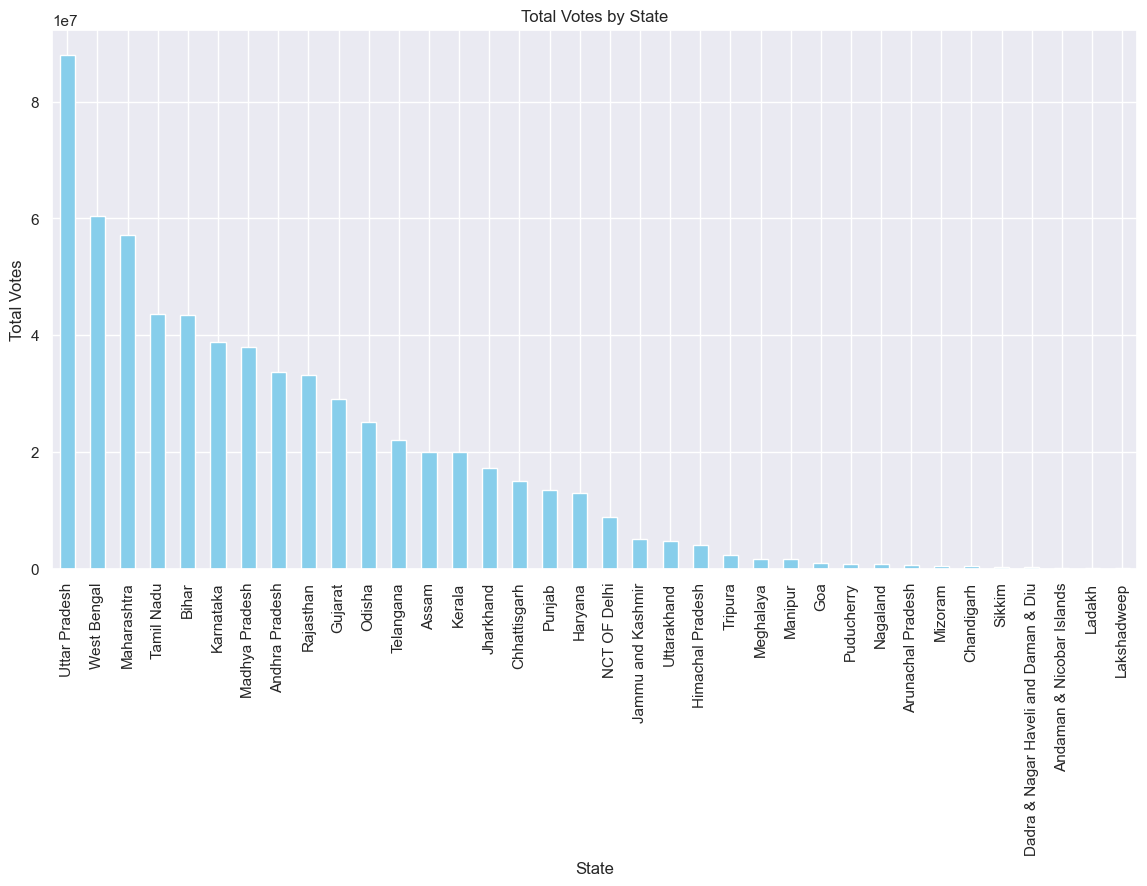

We can conclude that the total votes casted in Uttar Pradesh, West Bengal and Maharashtra are significantly higher than the other states.


In [54]:
# Total Votes by State
total_votes_by_state = data.groupby('State')['Total Votes'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
total_votes_by_state.plot(kind='bar', color='skyblue')
plt.title('Total Votes by State')
plt.xlabel('State')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.show()

print("We can conclude that the total votes casted in Uttar Pradesh, West Bengal and Maharashtra are significantly higher than the other states.")

This graph shows the total number of votes cast in each state. States with larger populations or higher voter turnout will have higher total votes. For example, a high total vote count in a particular state indicates significant voter engagement.

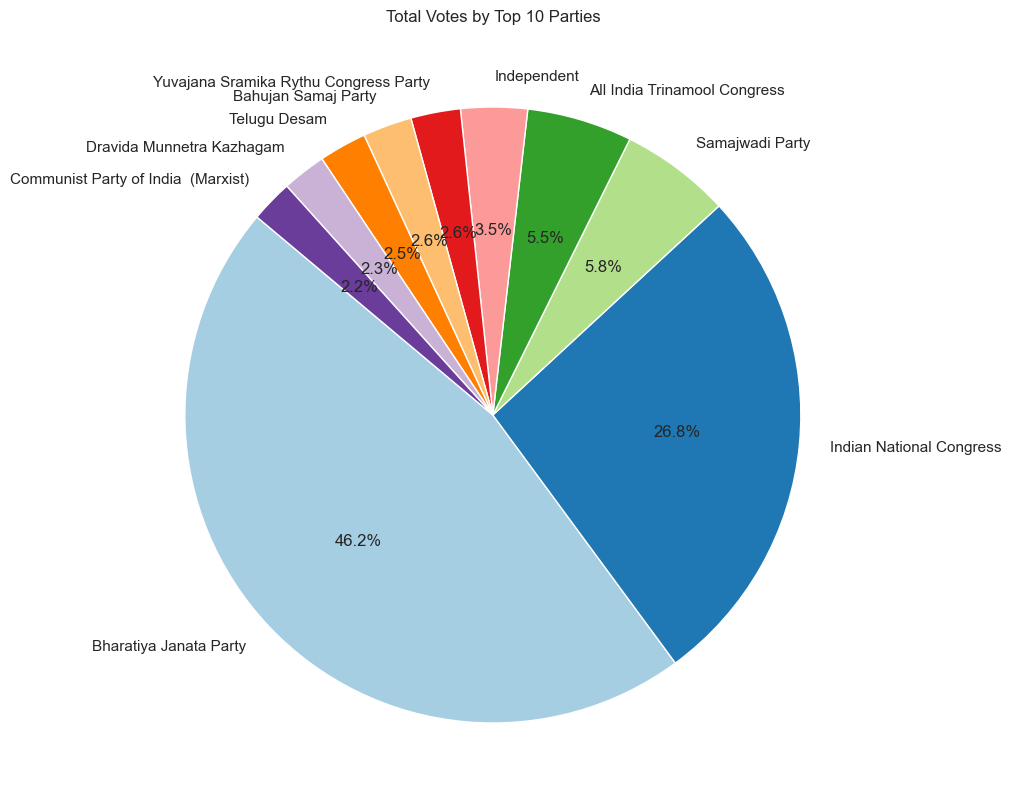

We can conclude that Bharatiya Janta Party has the most share of votes


In [74]:
# Total Votes by Party
top_10_votes_by_party = data.groupby('Party Name')['Total Votes'].sum().sort_values(ascending=False).head(10)

# Plotting a pie chart for the top 10 parties
plt.figure(figsize=(10, 10))
top_10_votes_by_party.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(top_10_votes_by_party))))
plt.title('Total Votes by Top 10 Parties')
plt.ylabel('')  # Hides the y-label for a cleaner look
plt.show()

print("We can conclude that Bharatiya Janta Party(BJP) has the most share of votes")

The pie chart below illustrates the distribution of total votes among the top 10 political parties in the 2024 Lok Sabha General Election. Each slice of the pie represents the proportion of votes received by a party, providing a clear visual comparison of their electoral performance.

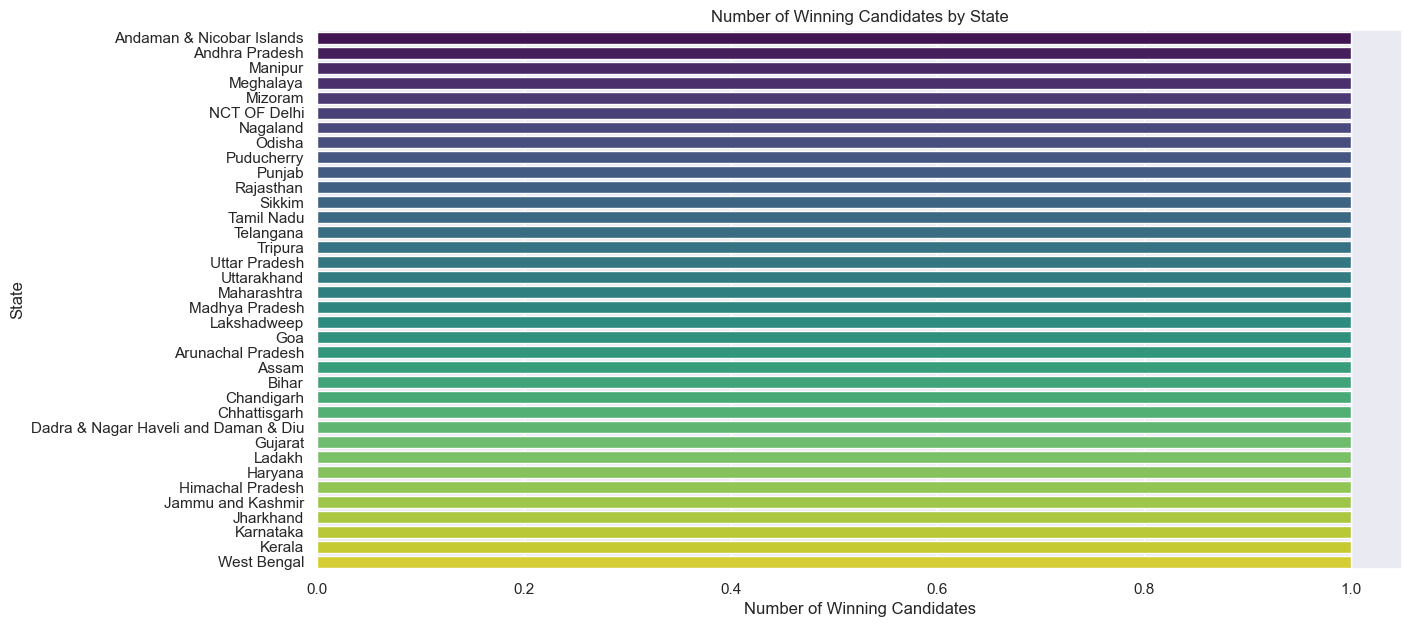

In [56]:
# Winning Candidates by State
winners_by_state = data.loc[data.groupby('State')['Total Votes'].idxmax()]
plt.figure(figsize=(14, 7))
sns.countplot(y='State', data=winners_by_state, order=winners_by_state['State'].value_counts().index, palette='viridis')
plt.title('Number of Winning Candidates by State')
plt.xlabel('Number of Winning Candidates')
plt.ylabel('State')
plt.show()

This count plot indicates the number of winning candidates from each state, showing the political diversity and competitiveness within states. States with more winning candidates highlight political variability.

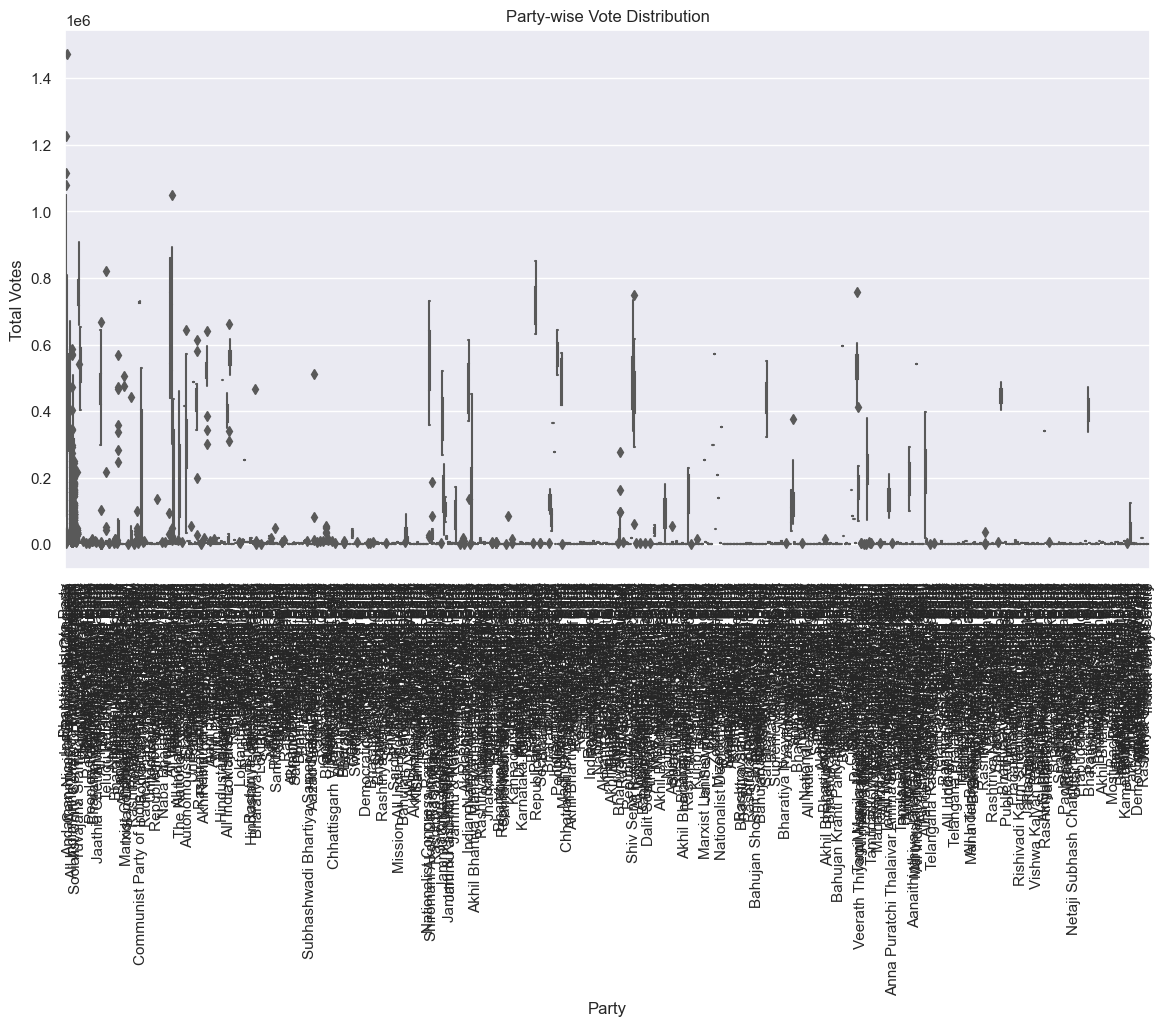

In [57]:
# Party-wise Vote Distribution
plt.figure(figsize=(14, 7))
sns.boxplot(x='Party Name', y='Total Votes', data=data, palette='Set2')
plt.title('Party-wise Vote Distribution')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.show()

The box plot shows the distribution of total votes across different parties. It helps identify the spread and central tendency of votes each party received. Parties with higher medians and narrower interquartile ranges indicate consistent support.

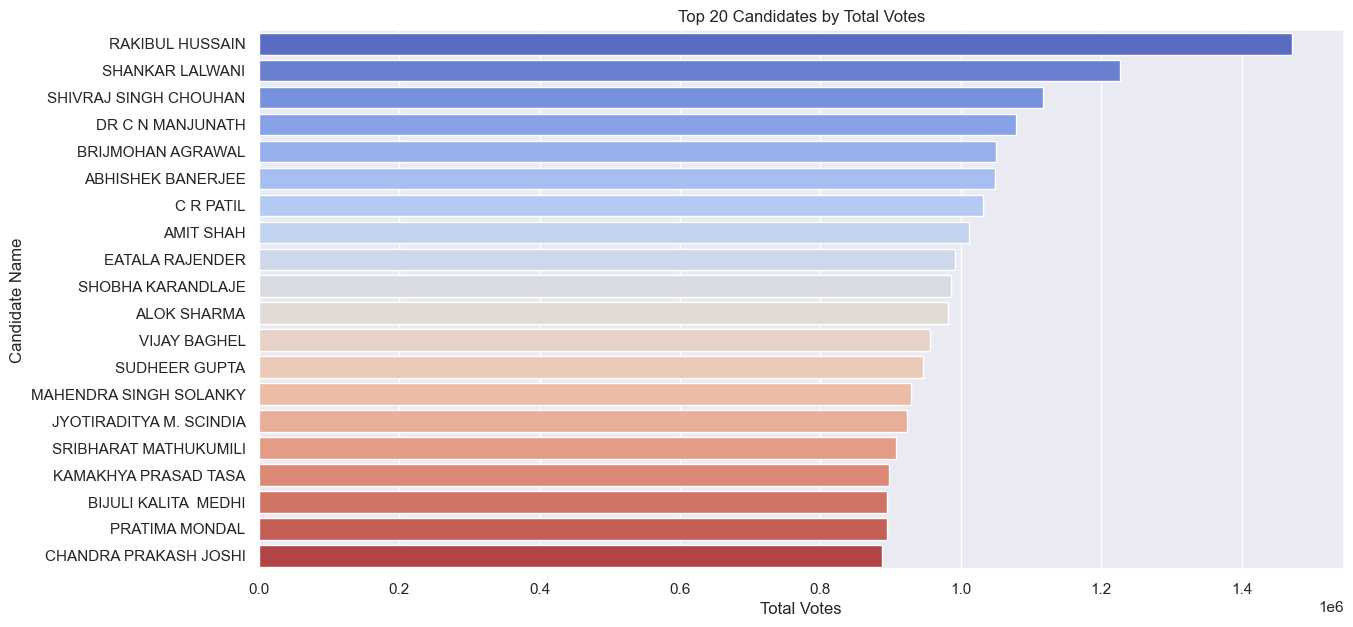

We can say that Rakibul Hussain was the candidate that got the most no. of votes as a candidate in the 2024 General Lok Sabha Election


In [63]:
# Candidate-wise Vote Distribution
top_candidates = data.nlargest(20, 'Total Votes')
plt.figure(figsize=(14, 7))
sns.barplot(x='Total Votes', y='Candidate Name', data=top_candidates, palette='coolwarm')
plt.title('Top 20 Candidates by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Candidate Name')
plt.show()

print("We can say that Rakibul Hussain was the candidate that got the most no. of votes as a candidate in the 2024 General Lok Sabha Election")

This bar plot highlights the top 20 candidates with the most votes, indicating their popularity and possibly strong electoral strategies. These candidates are likely significant figures in their respective constituencies.

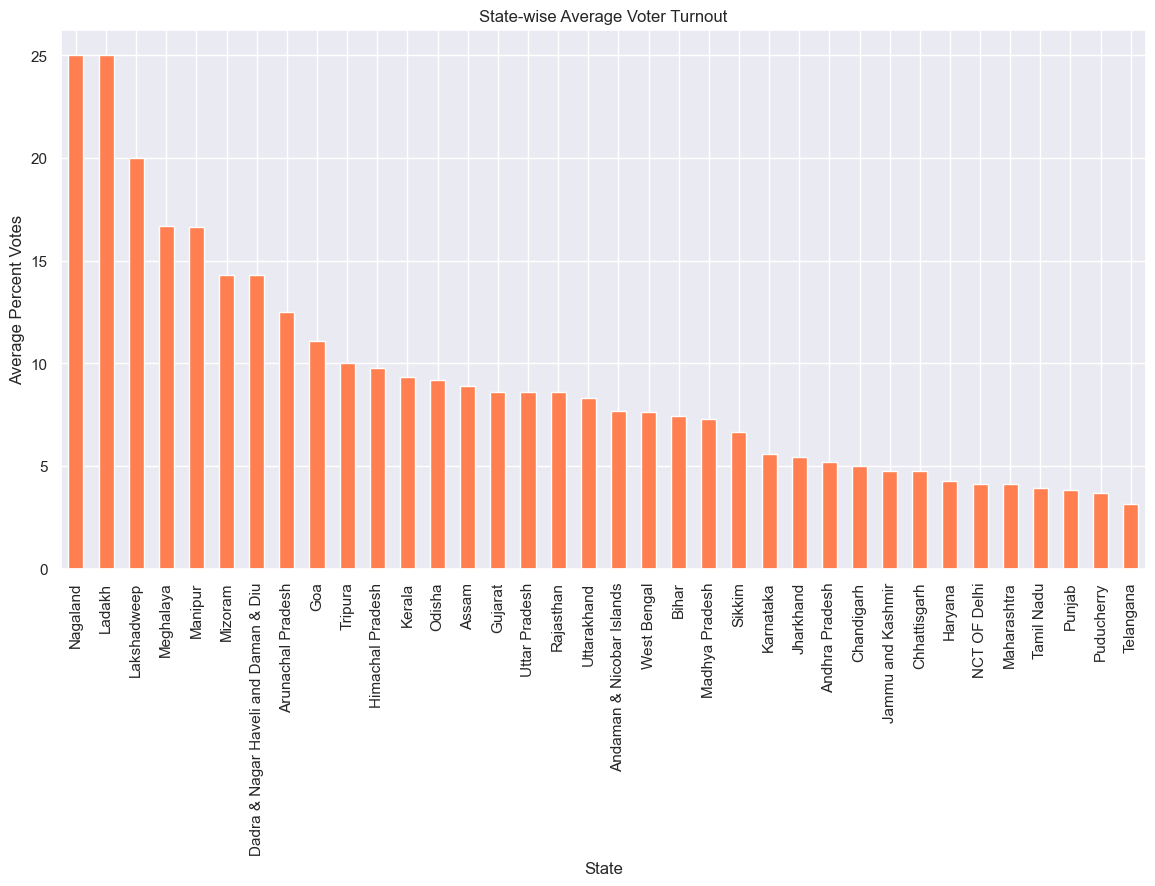

This shows that Nagaland and Ladakh had higher average voter turnout amongst all the other states


In [65]:
# State-wise Avg. Voter Turnout
state_voter_turnout = data.groupby('State')['Percent Votes'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
state_voter_turnout.plot(kind='bar', color='coral')
plt.title('State-wise Average Voter Turnout')
plt.xlabel('State')
plt.ylabel('Average Percent Votes')
plt.xticks(rotation=90)
plt.show()

print("This shows that Nagaland and Ladakh had higher average voter turnout amongst all the other states")

This bar chart shows the average voter turnout percentage in each state, revealing states with the most engaged electorates. High average percentages suggest effective voter mobilization efforts.

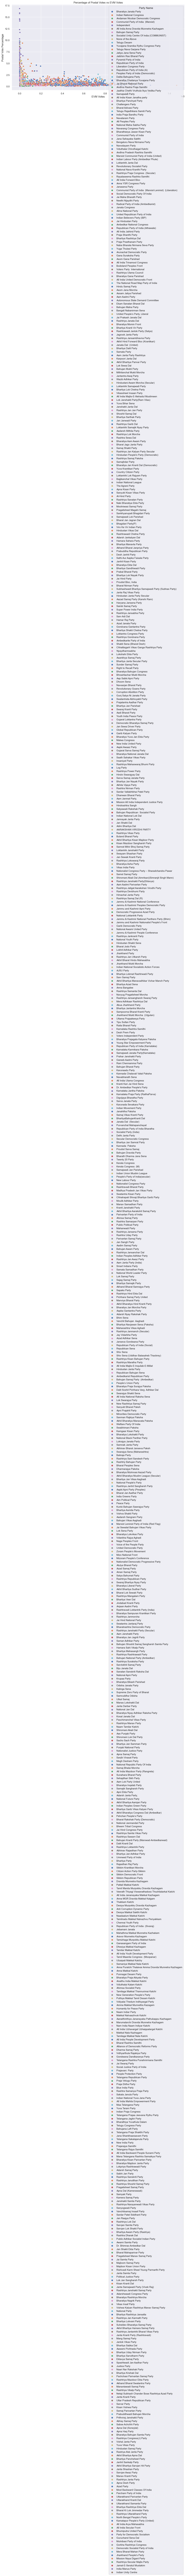

We can conclude that a lot of people have casted their votes using the EVM Vote as compared to the Postal Vote


In [66]:
# Percentage of Postal Votes vs EVM Votes
data['Postal Vote Percentage'] = (data['Postal Votes'] / data['Total Votes']) * 100
plt.figure(figsize=(14, 7))
sns.scatterplot(x='EVM Votes', y='Postal Vote Percentage', data=data, hue='Party Name', palette='deep')
plt.title('Percentage of Postal Votes vs EVM Votes')
plt.xlabel('EVM Votes')
plt.ylabel('Postal Vote Percentage')
plt.show()

print("We can conclude that a lot of people have casted their votes using the EVM Vote as compared to the Postal Vote")

The scatter plot shows the relationship between EVM votes and postal vote percentages, indicating how different parties or candidates rely on postal voting. Clusters can indicate parties with similar voting patterns.

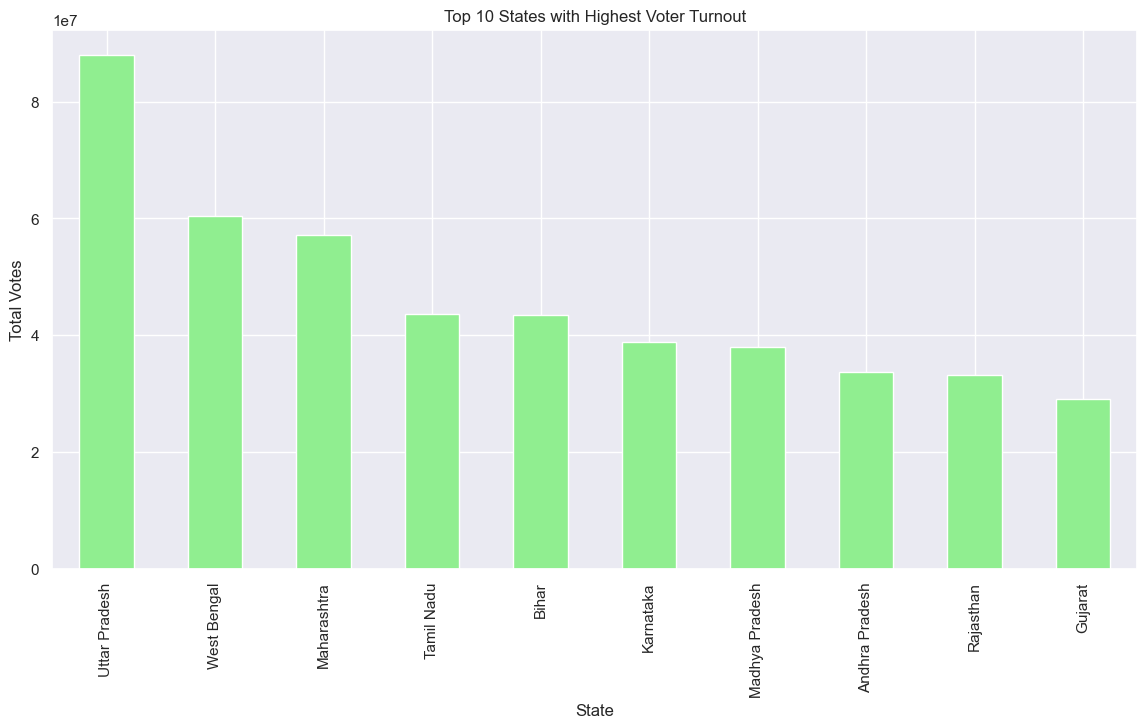

Uttar Pradesh has had the highest Voter Turnout in the 2024 Lok Sabha General Election


In [82]:
# States with Highest Voter Turnout
highest_turnout_states = data.groupby('State')['Total Votes'].sum().nlargest(10)
plt.figure(figsize=(14, 7))
highest_turnout_states.plot(kind='bar', color='lightgreen')
plt.title('Top 10 States with Highest Voter Turnout')
plt.xlabel('State')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.show()

print("Uttar Pradesh has had the highest Voter Turnout in the 2024 Lok Sabha General Election")

This bar chart shows the top 10 states with the highest total votes, indicating where voter turnout was the most substantial. This can help identify states with high political engagement.

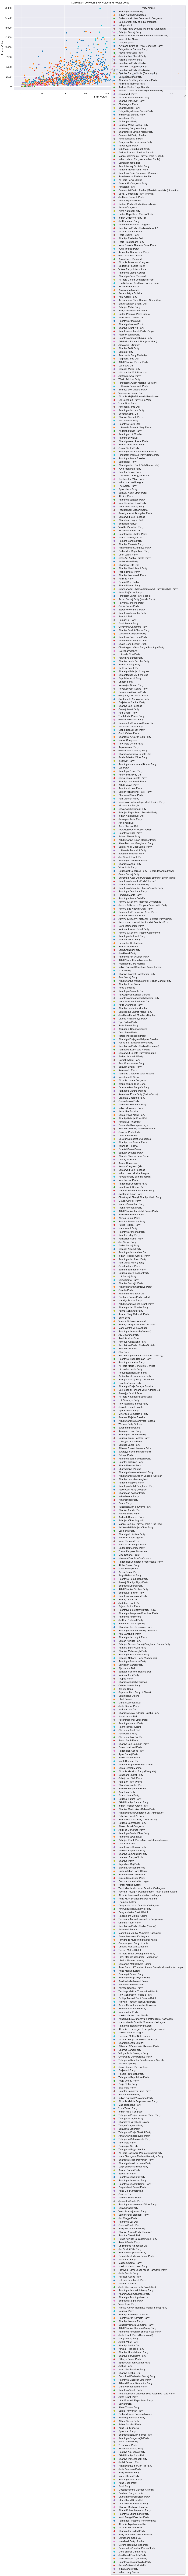

This relationship graph says that there are more number of EVM Votes as compared to the Postal Votes. Therefore the Election Commission should continue with the EVM machine for future elections and try to make it more accessible to people.


In [70]:
# Correlation between EVM and Postal Votes
plt.figure(figsize=(14, 7))
sns.scatterplot(x='EVM Votes', y='Postal Votes', data=data, hue='Party Name', palette='tab10')
plt.title('Correlation between EVM Votes and Postal Votes')
plt.xlabel('EVM Votes')
plt.ylabel('Postal Votes')
plt.show()

print("This relationship graph says that there are more number of EVM Votes as compared to the Postal Votes. Therefore the Election Commission should continue with the EVM machine for future elections and try to make it more accessible to people.")

The scatter plot reveals the correlation between EVM votes and postal votes, helping to identify if certain parties or candidates have higher postal vote reliance. Patterns or trends in the data can indicate the distribution strategy and voter base.